In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
ex2_4 = pd.read_csv("./exdata/ex2-4.csv", header = 0, index_col = 0)
ex2_4.head()

,Murder,Assault,UrbanPop,Rape
state,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [27]:
# 변수이름 확인하기
ex2_4.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [28]:
# 기술통계량 구하기 - 소수점 이하 2자리 반올림 표시
round(ex2_4.describe(), 2)


,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
25%,4.08,109.00,54.50,15.08
50%,7.25,159.00,66.00,20.10
75%,11.25,249.00,77.75,26.18
max,17.40,337.00,91.00,46.00


In [29]:
##### ② 상관계수행렬 및 산점도행렬 보기
# 상관계수 행렬
ex2_4.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


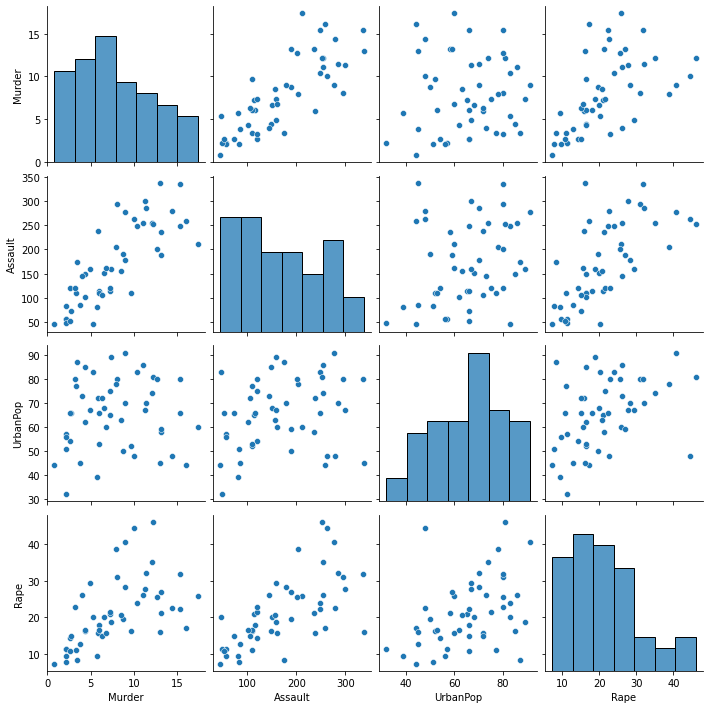

In [30]:
# 산점도 행렬(seaborn 사용)
import seaborn as sns
sns.pairplot(ex2_4)

In [31]:
##### ③ 주성분분석 실행하기
from sklearn.decomposition import PCA
# 주성분분석 - 주성분 수를 3으로 함.
pca = PCA(n_components=4)
pca_ex2_4 = pca.fit_transform(ex2_4)

In [33]:
# 주성분 표준편차
np.sqrt(pca.explained_variance_)

array([83.73240025, 14.21240185,  6.48942607,  2.48279   ])

In [34]:
# 주성분 분산
pca.explained_variance_

array([7.01111485e+03, 2.01992366e+02, 4.21126508e+01, 6.16424618e+00])

In [35]:
# 주성분분산비율
pca.explained_variance_ratio_

array([9.65534221e-01, 2.78173366e-02, 5.79953492e-03, 8.48907879e-04])

In [36]:
# 주성분계수 - 소숫점 이하 3자리 표시
np.round(pca.components_, 3)

array([[ 0.042,  0.995,  0.046,  0.075],
       [ 0.045,  0.059, -0.977, -0.201],
       [ 0.08 , -0.068, -0.201,  0.974],
       [ 0.995, -0.039,  0.058, -0.072]])

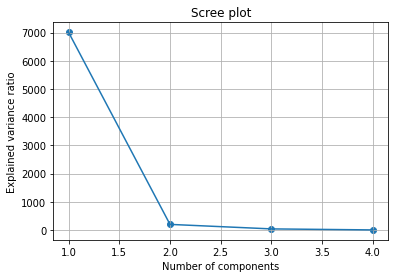

In [37]:
##### ④ 스크리 그림 및 주성분 계수
# 스크리 그림 그리기
import matplotlib.pyplot as plt
plt.scatter(range(1,pca.n_components_+1), pca.explained_variance_)
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_)
plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.grid()
plt.show()